# The Zen of Python

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Setting up Quandl for your environment

Data downloaded successfully.


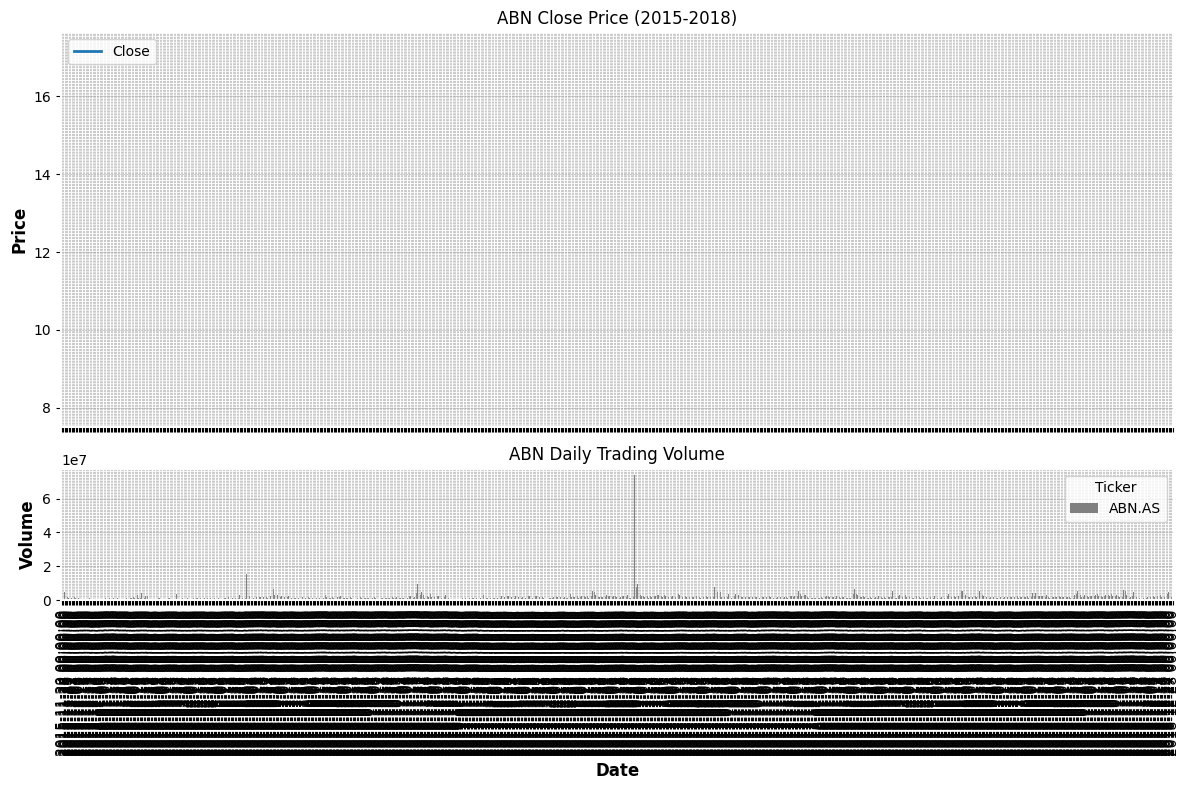

In [ ]:
# FIX: This single block replaces the entire "Setting up Quandl" section.
# REASON: The original code used the outdated `quandl` library and was missing
# the necessary date range for the download, resulting in a blank plot.
# This version uses the modern `yfinance` library and specifies the correct
# date range to generate the plot as intended.

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Download the Data for a Specific Date Range ---
print("Downloading ABN.AS data...")
df = yf.download(
    'ABN.AS',
    start='2015-01-01', # FIX: Added start date
    end='2018-12-31',   # FIX: Added end date
    auto_adjust=True,
    progress=False
)

# --- 2. Check if the Download was Successful ---
if df.empty:
    raise ValueError("Data download failed. Please wait a few minutes and try again.")
print("Data downloaded successfully.")

# --- 3. Prepare the Data for Plotting ---
prices = df['Close']
volumes = df['Volume']

# --- 4. Create the Plot ---
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(12, 8),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# Top Plot (Price)
prices.plot(ax=ax1, title='ABN Close Price (2015-2018)', legend=False)
ax1.set_ylabel('Price')
ax1.legend(['Close'], loc='upper left')

# Bottom Plot (Volume)
volumes.plot.bar(ax=ax2, title='ABN Daily Trading Volume', color='gray')
ax2.set_ylabel('Volume')

# Final Touches
plt.tight_layout()
plt.show()

## Plotting a candlestick chart

Data downloaded and cleaned successfully.


/tmp/ipython-input-16-2241187875.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_subset = yf.download(


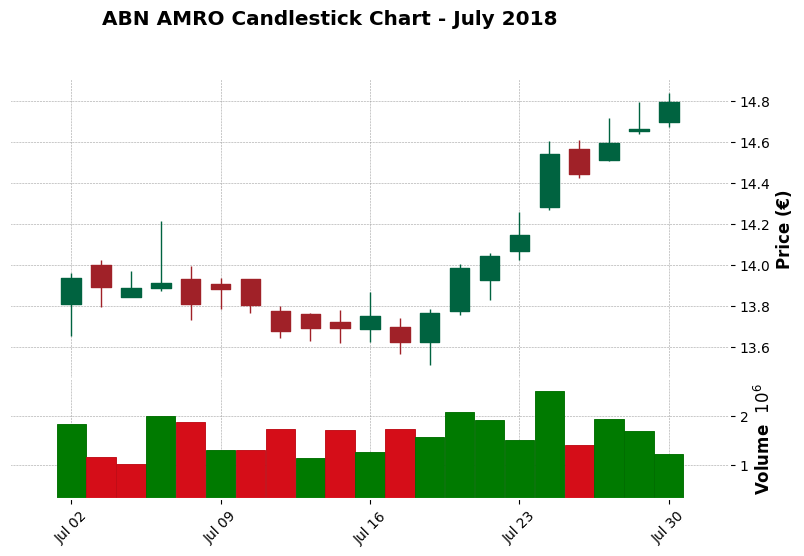

In [ ]:
# FIX 1: Use pip to install the necessary libraries
!pip install yfinance mplfinance

import yfinance as yf
import mplfinance as mpf
import pandas as pd

# --- 1. Download the Data ---
print("Downloading ABN.AS data...")
df_subset = yf.download(
    'ABN.AS',
    start='2018-07-01',
    end='2018-07-31',
    progress=False
)

# --- 2. Check and Clean the Data ---
if df_subset.empty:
    raise ValueError("Data download failed. Please wait a few minutes and try again.")

# FIX 2: Flatten the multi-level column headers into single-level names
if isinstance(df_subset.columns, pd.MultiIndex):
    df_subset.columns = df_subset.columns.get_level_values(0)

print("Data downloaded and cleaned successfully.")

# --- 3. Plot the Candlestick Chart ---
# The plot function will now work correctly with the cleaned DataFrame
mpf.plot(
    df_subset,
    type='candle',
    style='charles',
    title='ABN AMRO Candlestick Chart - July 2018',
    ylabel='Price (€)',
    volume=True,
    figsize=(10, 6)
)

In [ ]:
## Performing Financial Analytics

In [ ]:
#Plotting returns

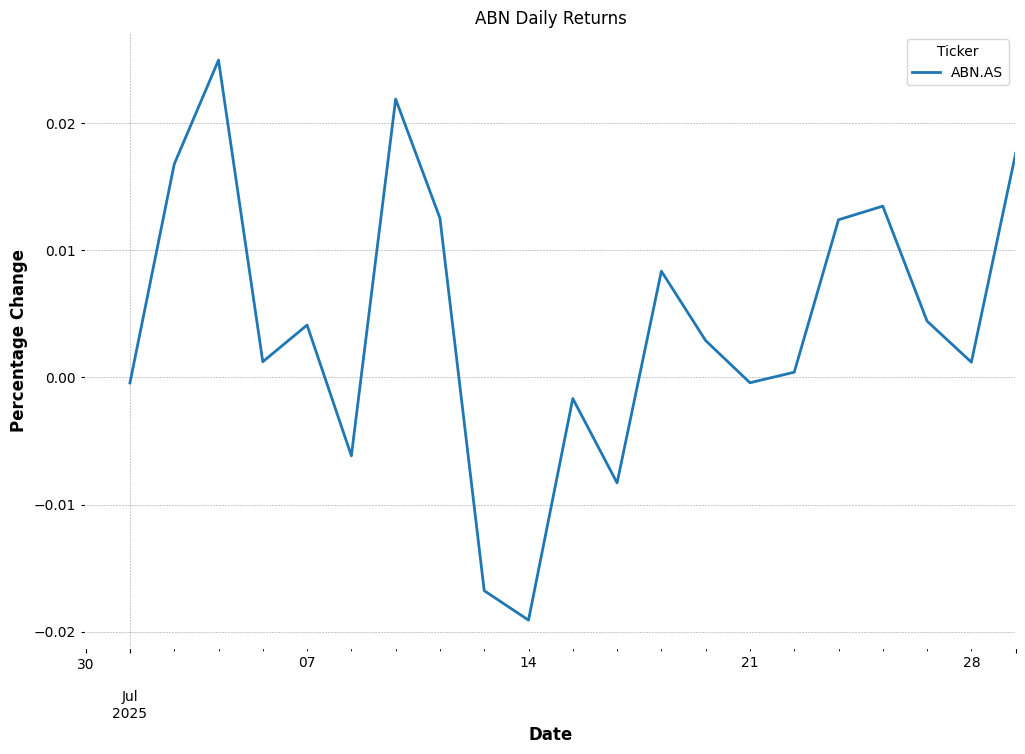

In [ ]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt

# FIX: Download the data using yfinance
df = yf.download('ABN.AS', auto_adjust=True, progress=False)

# Calculate the daily percentage change on the 'Close' column
daily_changes = df['Close'].pct_change(periods=1)

# Plot the results
daily_changes.plot(figsize=(12, 8), title="ABN Daily Returns")
plt.ylabel("Percentage Change")
plt.grid(True)
plt.show()

## Plotting cummulative returns

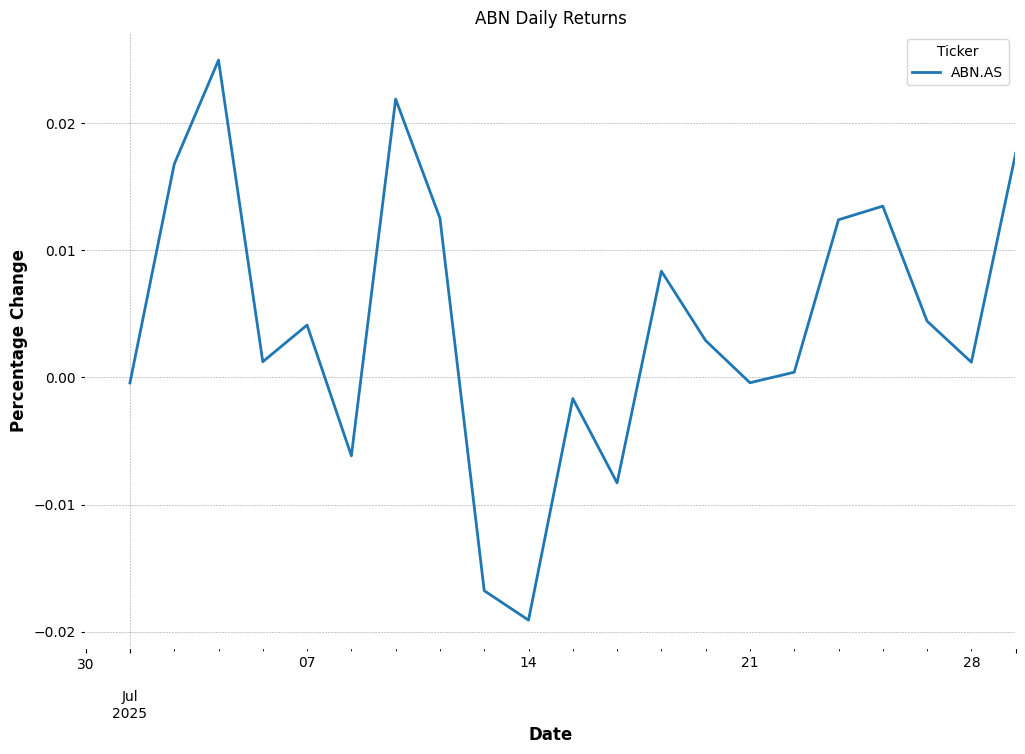

In [ ]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt

# FIX: Download the data using yfinance
df = yf.download('ABN.AS', auto_adjust=True, progress=False)

# Calculate the daily percentage change
daily_changes = df['Close'].pct_change(periods=1)

# Plot the results
daily_changes.plot(figsize=(12,8), title="ABN Daily Returns")
plt.ylabel("Percentage Change")
plt.show()

## Plotting Histograms

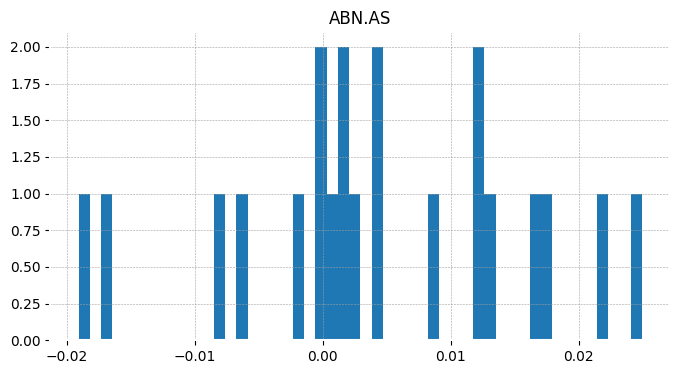

In [ ]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [ ]:
daily_changes.describe()

Ticker,ABN.AS
count,21.000000
mean,0.004267
std,0.011581
min,-0.019098
25%,-0.000430
50%,0.002905
75%,0.012541
max,0.024979


## Plotting volatility

Data downloaded successfully.


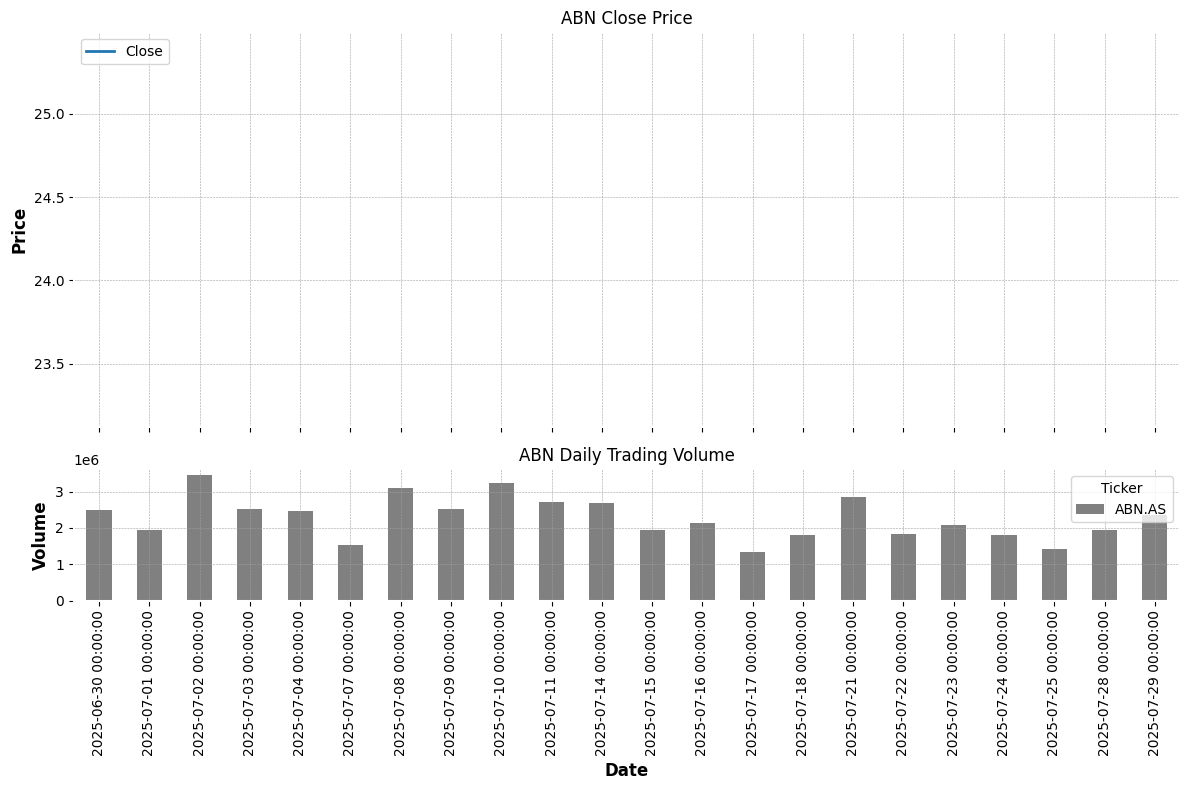

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Download the Data ---
print("Downloading ABN.AS data...")
df = yf.download('ABN.AS', auto_adjust=True, progress=False)

# --- 2. Check if the Download was Successful ---
# FIX: This check prevents errors if the download fails.
if df.empty:
    raise ValueError("Data download failed, the DataFrame is empty. Please wait a few minutes and try again.")
print("Data downloaded successfully.")

# --- 3. Prepare the Data for Plotting ---
prices = df['Close']
volumes = df['Volume']

# --- 4. Create the Plot ---
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(12, 8),
    sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# Top Plot (Price)
prices.plot(ax=ax1, title='ABN Close Price', legend=False)
ax1.set_ylabel('Price')
ax1.legend(['Close'], loc='upper left')

# Bottom Plot (Volume)
volumes.plot.bar(ax=ax2, title='ABN Daily Trading Volume', color='gray')
ax2.set_ylabel('Volume')

# Final Touches
plt.tight_layout()
plt.show()

## Quantile-Quantile Plot

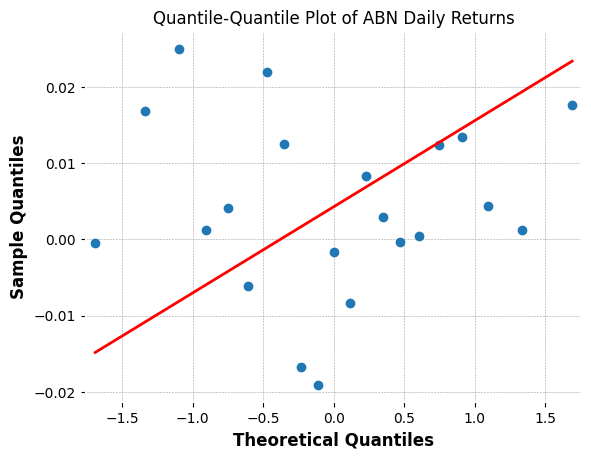

In [ ]:
# FIX 1: Install and import the necessary libraries
!pip install yfinance statsmodels

import yfinance as yf
import statsmodels.api as sm # Import the statsmodels library
import matplotlib.pyplot as plt

# --- 1. Download the Data ---
df = yf.download('ABN.AS', auto_adjust=True, progress=False)

# Calculate the daily percentage change
daily_changes = df['Close'].pct_change(periods=1).dropna()

# --- 2. Create the Quantile-Quantile plot ---
# FIX 2: Use the more robust qqplot function from the statsmodels library
fig = sm.qqplot(daily_changes, line='s') # 's' standardized line
plt.title('Quantile-Quantile Plot of ABN Daily Returns')
plt.show()

## Downloading multiple time series data

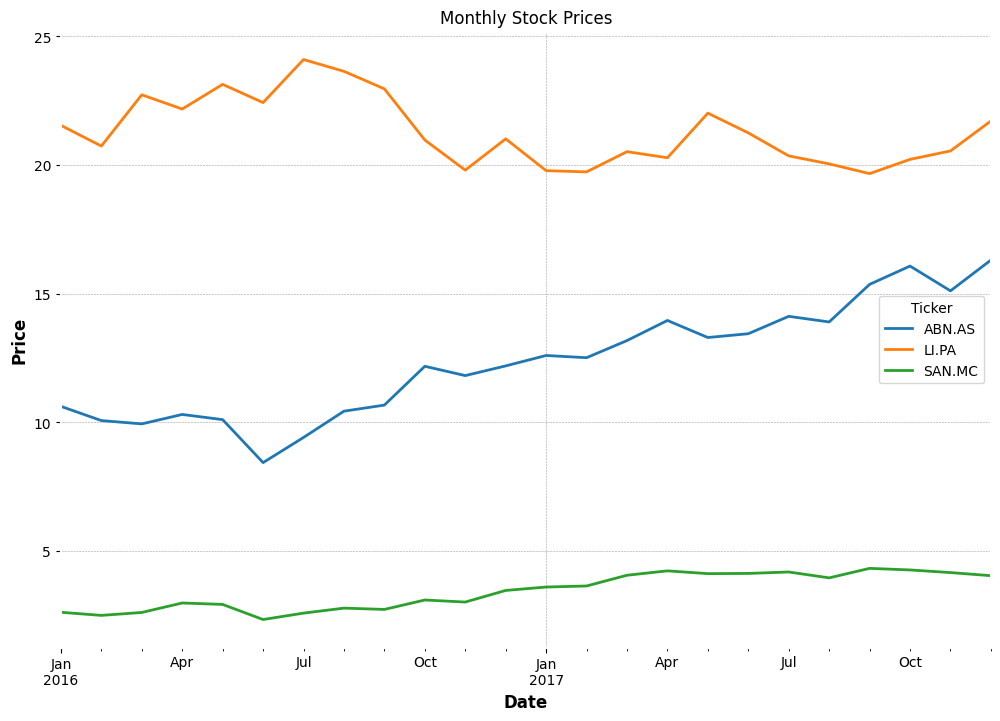

In [ ]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt

# FIX: Use the modern yfinance tickers for the stocks
# ABN AMRO (ABN.AS), Santander (SAN.MC), Klepierre (LI.PA)
TICKERS = ['ABN.AS', 'SAN.MC', 'LI.PA']

# FIX: Download the monthly closing prices using yfinance
df = yf.download(
    TICKERS,
    start='2016-01-01',
    end='2017-12-31',
    interval='1mo',  # '1mo' for monthly data
    auto_adjust=True,
    progress=False
)['Close']

# Plot the results
df.plot(figsize=(12, 8), title="Monthly Stock Prices")
plt.ylabel("Price")
plt.show()

## Displaying the Correlation Matrix


In [ ]:
df.pct_change().corr()

,Price,Close,High,Low,Open,Volume
,Ticker,ABN.AS,ABN.AS,ABN.AS,ABN.AS,ABN.AS
Price,Ticker,,,,,
Close,ABN.AS,1.000000,0.732608,0.675417,0.543225,-0.039900
High,ABN.AS,0.732608,1.000000,0.829308,0.840155,0.156143
Low,ABN.AS,0.675417,0.829308,1.000000,0.692198,-0.046581
Open,ABN.AS,0.543225,0.840155,0.692198,1.000000,0.048900
Volume,ABN.AS,-0.039900,0.156143,-0.046581,0.048900,1.000000


## Plotting Correlations

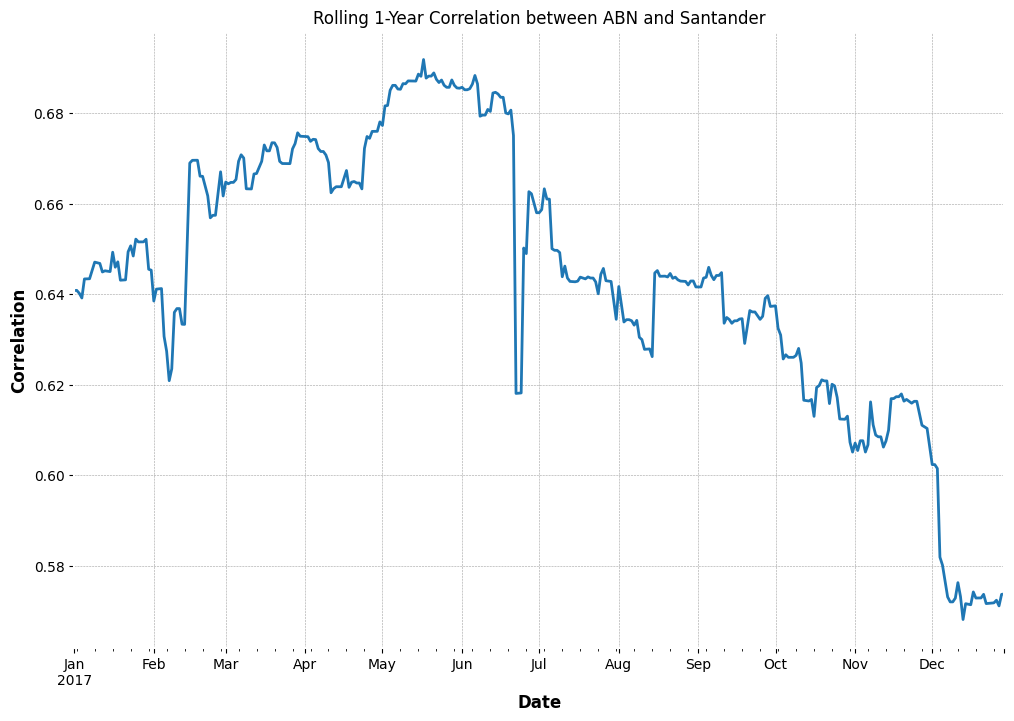

In [ ]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# FIX: Use the modern yfinance tickers for the stocks
# ABN AMRO (ABN.AS), Santander (SAN.MC)
TICKERS = ['ABN.AS', 'SAN.MC']

# FIX: Download the daily closing prices using yfinance
df = yf.download(
    TICKERS,
    start='2016-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)['Close']

# --- The rest of the logic is the same, just with updated column names ---

# Forward-fill missing values for non-trading days
df_filled = df.asfreq('D', method='ffill')

# Calculate daily returns
daily_changes = df_filled.pct_change()

# Extract the returns for each stock
abn_returns = daily_changes['ABN.AS']
santa_returns = daily_changes['SAN.MC']

# Calculate the rolling correlation
window = int(len(df_filled.index) / 2)
df_corrs = abn_returns.rolling(window=window).corr(other=santa_returns).dropna()

# Plot the results
df_corrs.plot(figsize=(12, 8), title="Rolling 1-Year Correlation between ABN and Santander")
plt.ylabel("Correlation")
plt.show()

## Simple moving averages


Data downloaded successfully.


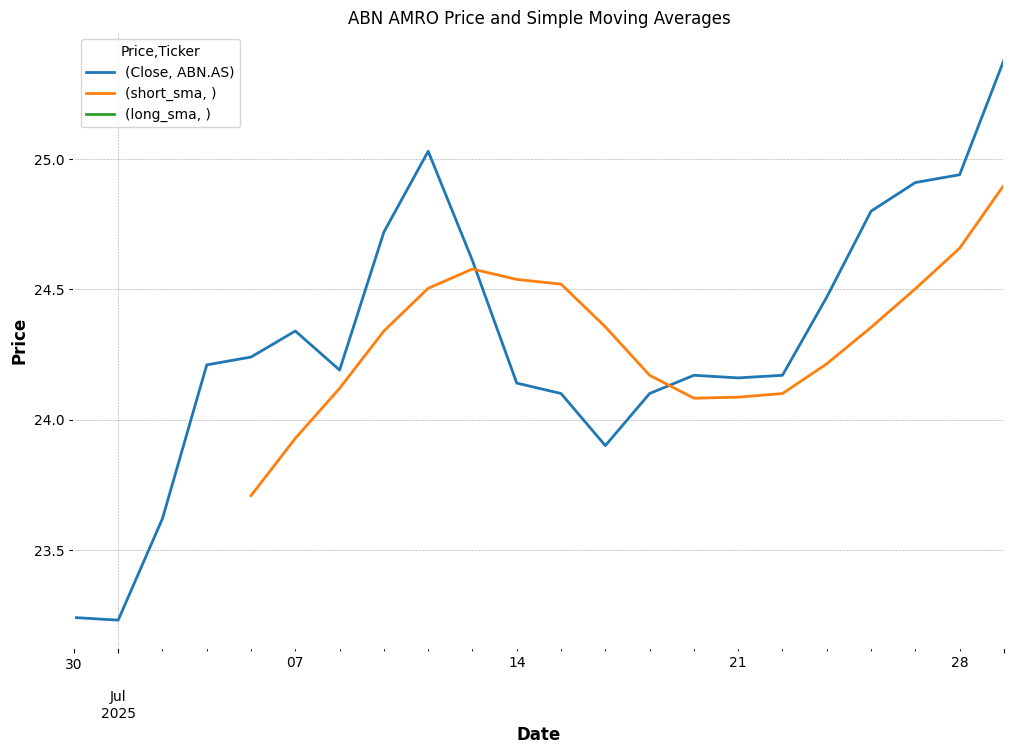

In [ ]:
# FIX: Install and import the necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Download the Data ---
print("Downloading ABN.AS data...")
df = yf.download('ABN.AS', auto_adjust=True, progress=False)

# --- 2. Check if the Download was Successful ---
# This check prevents errors if the download fails.
if df.empty:
    raise ValueError("Data download failed. The DataFrame is empty. Please wait a few minutes and try again.")
print("Data downloaded successfully.")

# --- 3. Calculate SMAs and Plot ---
# FIX: Add the SMAs as new columns to the DataFrame and plot directly.
# This is a more robust and modern way to perform this analysis.
df['short_sma'] = df['Close'].rolling(window=5).mean()
df['long_sma'] = df['Close'].rolling(window=30).mean()

# Plot the Close price and the two moving averages
df[['Close', 'short_sma', 'long_sma']].plot(
    figsize=(12, 8),
    title="ABN AMRO Price and Simple Moving Averages"
)
plt.ylabel("Price")
plt.show()

## Exponential Moving Average


Data downloaded successfully.


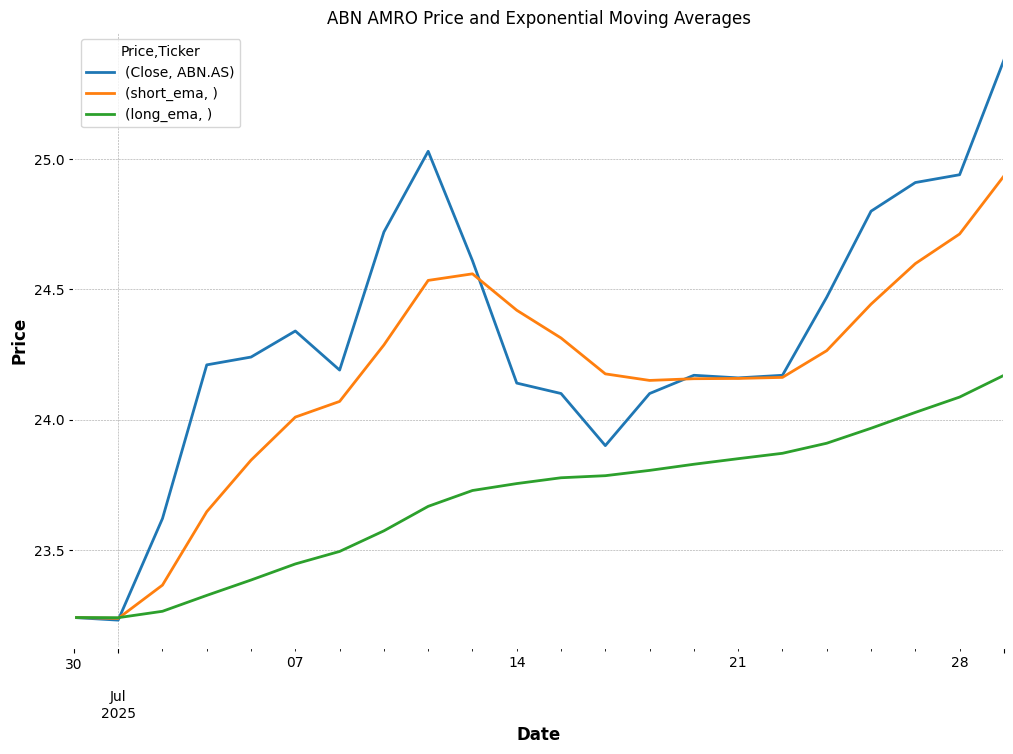

In [ ]:
# FIX: Install and import the yfinance library
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Download the Data ---
print("Downloading ABN.AS data...")
df = yf.download('ABN.AS', auto_adjust=True, progress=False)

# --- 2. Check if the Download was Successful ---
if df.empty:
    raise ValueError("Data download failed. Please wait a few minutes and try again.")
print("Data downloaded successfully.")

# --- 3. Calculate Exponential Moving Averages (EMAs) and Plot ---
# FIX: Use the .ewm() method for Exponential Moving Average
df['short_ema'] = df['Close'].ewm(span=5, adjust=False).mean()
df['long_ema'] = df['Close'].ewm(span=30, adjust=False).mean()

# Plot the Close price and the two EMAs
df[['Close', 'short_ema', 'long_ema']].plot(
    figsize=(12, 8),
    title="ABN AMRO Price and Exponential Moving Averages"
)
plt.ylabel("Price")
plt.show()